<a href="https://colab.research.google.com/github/MBSteven/SF_Fire_Department_Analysis/blob/master/Copy_of_Assignment6_Dizhu_Tong_3666_01_ANLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')


%cd /gdrive/My Drive/3666/Module5

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/3666/Module5


In [0]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.base import MetaEstimatorMixin,BaseEstimator, TransformerMixin,ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.matutils import sparse2full
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
import gensim
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [0]:
Metadata_col = ['Wiki_Id','Freebase_Id','Name','Release_Date','Revenue','Runtime','Language','Country','Genres']
df = pd.read_csv('movie.metadata.tsv', sep='\t',names = Metadata_col)
df = df[['Wiki_Id','Genres']]
df.head()

,Wiki_Id,Genres
0,975900,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,"{""/m/07s9rl0"": ""Drama""}"


In [0]:
summary_col = ['Id','summary']
summary = pd.read_csv('plot_summaries.txt', sep="\t", header=None,names = summary_col)
summary.head()

,Id,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [0]:
import re
regex_pat = re.compile(r'"/m/.+?:', flags=re.IGNORECASE)
G = df['Genres']
G = G.replace(regex_pat, '')
G = G.str.replace('{','').str.replace('}','').str.replace(' ','').str.replace('"','')
for i in range(len(G)):
    G_list = G
    G_list[i] = tuple(G[i].split(','))

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

In [0]:
# Create MultiLabelBinarizer object
one_hot = MultiLabelBinarizer()

# One-hot encode data
label = one_hot.fit_transform(G_list)
label.shape

(81741, 364)

In [0]:
label_name = list(one_hot.classes_)
print('Length of Genres:', len(G),'. Length of Label:',len(label))

Length of Genres: 81741 . Length of Label: 81741


In [0]:
target = pd.DataFrame(label,columns= label_name)
target.head()

,,Absurdism,Acidwestern,Action,Action/Adventure,ActionComedy,ActionThrillers,AddictionDrama,Adult,Adventure,AdventureComedy,Airplanesandairports,Albinobias,AlienFilm,Alieninvasion,Americana,AnimalPicture,Animals,AnimatedMusical,Animatedcartoon,Animation,Anime,Anthology,Anthropology,Anti-war,Anti-warfilm,Apocalypticandpost-apocalypticfiction,Archaeology,Archivesandrecords,Artfilm,Autoracing,Avant-garde,B-Western,B-movie,BackstageMusical,Baseball,BeachFilm,BeachPartyfilm,BengaliCinema,BikerFilm,...,Starvehicle,Statutoryrape,Steampunk,Stonerfilm,Stopmotion,Superhero,Superheromovie,Supermarionation,Supernatural,Surrealism,Suspense,Swashbucklerfilms,SwordandSandal,Swordandsorcery,Swordandsorceryfilms,Tamilcinema,Teen,Televisionmovie,TheNetherlandsinWorldWarII,Theriminmusic,Thriller,Timetravel,Tokusatsu,Tollywood,Tragedy,Tragicomedy,Travel,Vampiremovies,Wareffort,Warfilm,Werewolffiction,Western,Whodunit,Womeninprisonfilms,WorkplaceComedy,WorldHistory,Worldcinema,Wuxia,Zmovie,ZombieFilm
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df1 = df.merge(G,left_index=True, right_index=True)
df1 = df1[['Wiki_Id','Genres_y']]
df1 = df1.merge(target,left_index=True, right_index=True).drop('Genres_y',axis=1)
df1.head()

,Wiki_Id,,Absurdism,Acidwestern,Action,Action/Adventure,ActionComedy,ActionThrillers,AddictionDrama,Adult,Adventure,AdventureComedy,Airplanesandairports,Albinobias,AlienFilm,Alieninvasion,Americana,AnimalPicture,Animals,AnimatedMusical,Animatedcartoon,Animation,Anime,Anthology,Anthropology,Anti-war,Anti-warfilm,Apocalypticandpost-apocalypticfiction,Archaeology,Archivesandrecords,Artfilm,Autoracing,Avant-garde,B-Western,B-movie,BackstageMusical,Baseball,BeachFilm,BeachPartyfilm,BengaliCinema,...,Starvehicle,Statutoryrape,Steampunk,Stonerfilm,Stopmotion,Superhero,Superheromovie,Supermarionation,Supernatural,Surrealism,Suspense,Swashbucklerfilms,SwordandSandal,Swordandsorcery,Swordandsorceryfilms,Tamilcinema,Teen,Televisionmovie,TheNetherlandsinWorldWarII,Theriminmusic,Thriller,Timetravel,Tokusatsu,Tollywood,Tragedy,Tragicomedy,Travel,Vampiremovies,Wareffort,Warfilm,Werewolffiction,Western,Whodunit,Womeninprisonfilms,WorkplaceComedy,WorldHistory,Worldcinema,Wuxia,Zmovie,ZombieFilm
0,975900,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3196793,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28463795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9363483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,261236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data_raw = summary.merge(df1,left_on='Id', right_on='Wiki_Id').drop(['Wiki_Id'],axis=1)
data_raw.head()

,Id,summary,,Absurdism,Acidwestern,Action,Action/Adventure,ActionComedy,ActionThrillers,AddictionDrama,Adult,Adventure,AdventureComedy,Airplanesandairports,Albinobias,AlienFilm,Alieninvasion,Americana,AnimalPicture,Animals,AnimatedMusical,Animatedcartoon,Animation,Anime,Anthology,Anthropology,Anti-war,Anti-warfilm,Apocalypticandpost-apocalypticfiction,Archaeology,Archivesandrecords,Artfilm,Autoracing,Avant-garde,B-Western,B-movie,BackstageMusical,Baseball,BeachFilm,BeachPartyfilm,...,Starvehicle,Statutoryrape,Steampunk,Stonerfilm,Stopmotion,Superhero,Superheromovie,Supermarionation,Supernatural,Surrealism,Suspense,Swashbucklerfilms,SwordandSandal,Swordandsorcery,Swordandsorceryfilms,Tamilcinema,Teen,Televisionmovie,TheNetherlandsinWorldWarII,Theriminmusic,Thriller,Timetravel,Tokusatsu,Tollywood,Tragedy,Tragicomedy,Travel,Vampiremovies,Wareffort,Warfilm,Werewolffiction,Western,Whodunit,Womeninprisonfilms,WorkplaceComedy,WorldHistory,Worldcinema,Wuxia,Zmovie,ZombieFilm
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,31186339,The nation of Panem consists of a wealthy Capi...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20663735,Poovalli Induchoodan is sentenced for six yea...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,595909,Seventh-day Adventist Church pastor Michael Ch...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
categories = list(data_raw.columns.values)
categories = categories[2:]
#print(categories)
counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'count']).sort_values(by='count', ascending=False)
top10 = df_stats.head(10)

In [0]:
top10

,category,count
115,Drama,19134
76,Comedy,10467
289,RomanceFilm,6666
344,Thriller,6530
3,Action,5868
360,Worldcinema,5153
99,CrimeFiction,4275
190,Horror,4082
43,Black-and-white,3731
197,Indie,3668


In [0]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

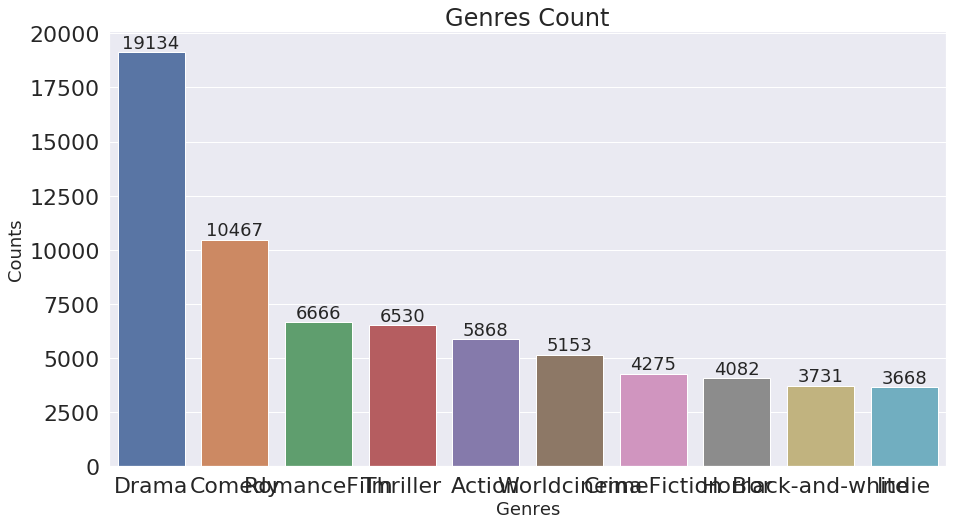

In [0]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(top10['category'], top10['count'])

plt.title("Genres Count", fontsize=24)
plt.ylabel('Counts', fontsize=18)
plt.xlabel('Genres', fontsize=18)

#adding the text labels
rects = ax.patches
labels = top10['count']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

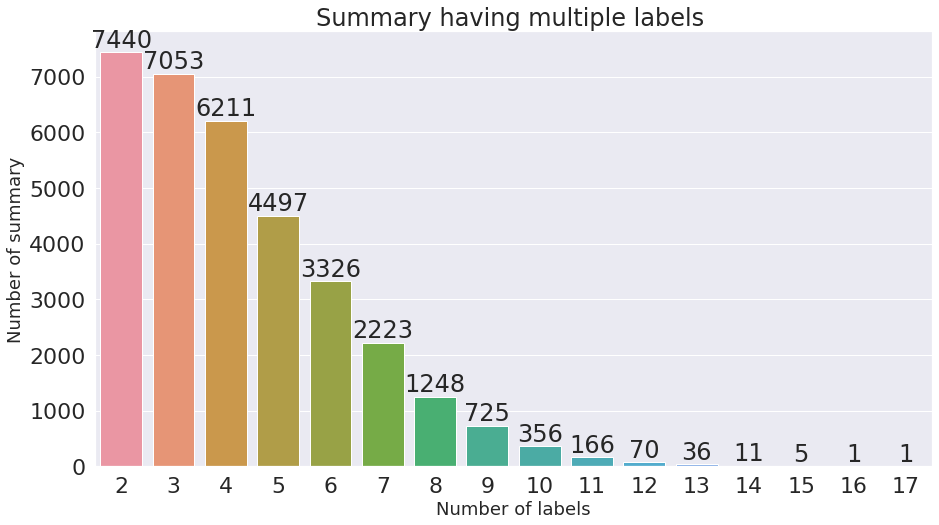

In [0]:

rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Summary having multiple labels ")
plt.ylabel('Number of summary', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

The most common number of labels is 2. There are 364 different labels. However, there are many redudent labels and not movit genres. We need remove and replace those labels

In [0]:
movieData = pd.read_csv('movie.metadata.tsv', sep='\t', header=0, encoding='utf-8',
                        names=["WikipediaID", "FreebaseID", "name", "date", "boxOffice", "runtime",
                               "languages", "countries", "genres"],
                        usecols=["WikipediaID", "name", "date", "languages", "countries", "genres"],
                        index_col=0)
movieData.dropna(subset=['genres'], inplace=True)#this was found to improve the quality of the fit

In [0]:
def extractTags(string):
    return re.findall('"([\w\s]+)"', string)

movieData["genres"] = movieData["genres"].apply(extractTags)
movieData["genres"].head()

WikipediaID
3196793      [Mystery, Biographical film, Drama, Crime Drama]
28463795                               [Crime Fiction, Drama]
9363483     [Thriller, Erotic thriller, Psychological thri...
261236                                                [Drama]
13696889             [Short Film, Silent film, Indie, Comedy]
Name: genres, dtype: object

In [0]:
movieData["languages"] = movieData["languages"].apply(extractTags)
movieData["countries"] = movieData["countries"].apply(extractTags)

isInEnglish = lambda langauges : u'English Language' in langauges
movieData = movieData[movieData.languages.apply(isInEnglish)]

In [0]:
plot = pd.read_csv("plot_summaries.txt", sep='\t', encoding='utf-8', 
                   names=["ident", "summary"], index_col=0)

In [0]:
result = pd.merge(movieData, plot, left_index=True, right_index=True, how='inner')
result.head()

,name,date,languages,countries,genres,summary
9363483,White Of The Eye,1987,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
18998739,The Sorcerer's Apprentice,2002,[English Language],[South Africa],"[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns..."
6631279,Little city,1997-04-04,[English Language],[United States of America],"[Romantic comedy, Ensemble Film, Drama, Comedy...","Adam, a San Francisco-based artist who works a..."
171005,Henry V,1989-11-08,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
11250635,The Mechanical Monsters,NaN,[English Language],[United States of America],"[Science Fiction, Adventure, Animation, Short ...",The story starts as one of the robots flies i...


Socure: https://github.com/igblackadder/movie_prediction/blob/master/genre%20prediction%20model.ipynb

In [0]:
toDelete = [u'Absurdism', u'Airplanes and airports', u'Albino bias',u'Americana',u'Animal Picture',u'Animals',u'Anthology', u'Anthropology', u'Archaeology',u'Archives and records',u'Art film', u'Beach Film',u'Beach Party film', u'Bengali Cinema',u'Blaxploitation', u'Bollywood',u'British Empire Film', u'British New Wave',u'Buddy film',u'Business', u'Camp',u'Cavalry Film', u'Chase Movie', u'Chinese Movies',u'Christmas movie',u'Cold War',u'Coming of age', u'Computers',u'Cult',u'Cyberpunk', u'Dogme 95', u'Doomsday film',u'Early Black Cinema',u'Education', u'Educational', u'Environmental Science',u'Ensemble Film', u'Escape Film', u'Essay Film', u'Existentialism',u'Experimental film', u'Exploitation', u'Expressionism', u'Fan film', u'Feature film', u'Female buddy film', u'Feminist Film', u'Fictional film', u'Filipino', u'Filipino Movies', u'Film', u'Film adaptation',u'Filmed Play', u'Foreign legion',u'Giallo',u'Goat gland', u'Gothic Film',u'Gross out',u'Hagiography', u'Holiday Film', u'Indie', u'Japanese Movies', u'Journalism',u'Jungle Film', u'Juvenile Delinquency Film',
            u'Kafkaesque', u'Kitchen sink realism', u'Latino', u'Libraries and librarians', u'Linguistics',u'Live action',u'Media Studies',u'Medical fiction',u'Mondo film',u'Movie serial',u'Mumblecore',u'Nature',u'New Hollywood', u'News',u'Northern', u'Nuclear warfare', u'Parkour in popular culture',u'Patriotic film', 
            u'Pinku eiga', u'Plague', u'Point of view shot',u'Prison',u'Private military company',u'Propaganda film',u'Reboot', u'Remake', u'Religious Film',u'Roadshow theatrical release',
            u'School story', u'Sexploitation', u'Sponsored film', u'Short Film',u'Singing cowboy', u'Slice of life story',u'Social issues', u'Social problem film', u'Sponsored film', u'Star vehicle',u'Statutory rape', u'Steampunk', u'Stoner film',u'Superhero', u'Superhero movie', u'Surrealism',u'Sword and Sandal', u'Sword and sorcery', u'Sword and sorcery films',  u'Television movie', u'The Netherlands in World War II',u'Tragedy', u'Travel', u'World cinema', u'Wuxia',u'Z movie']

In [0]:
toReplace = [(u'Acid western', [u'Western']),(u'Action Comedy', [u'Action', u'Comedy']),(u'Action Thrillers', [u'Action', u'Thriller']),(u'Addiction Drama', [u'Drama']),(u'Adventure Comedy',[u'Adventure', u'Comedy']),(u'Alien Film', [u'Creature Film', u'Science Fiction']),(u'Alien invasion', [u'Creature Film', u'Science Fiction']),(u'Animated Musical', [u'Animation']),(u'Animated cartoon', [u'Animation']),(u'Anime', [u'Animation']),(u'Auto racing', [u'Sports']),(u'Backstage Musical', [u'Musical']),(u'Baseball', [u'Sports']),(u'Biker Film', [u'Road movie']),(u'Biographical film', [u'Biography']),(u'Black comedy', [u'Comedy']),(u'Boxing', [u'Sports']),(u'Breakdance', [u'Dance']),(u'Buddy cop', [u'Crime']),(u'Caper story', [u'Crime', u'Comedy']),(u'Chick flick', [u'Romance']),(u'Childhood Drama',[u'Drama']),(u'Christian film', [u'Religious Film']),(u'Clay animation', [u'Animation']),
             (u'Combat Films', [u'Action']),(u'Comdedy',[u'Comedy']),(u'Comedy Thriller', [u'Comedy', u'Thriller']),(u'Comedy Western', [u'Comedy', u'Western']),(u'Comedy film', [u'Comedy']),(u'Comedy horror', [u'Comedy', u'Horror']),(u'Comedy of Errors', [u'Comedy']),(u'Comedy of manners', [u'Comedy']),(u'Computer Animation', [u'Animation']),(u'Concert film', [u'Music']),(u'Conspiracy fiction', [u'Thriller']),(u'Costume Adventure', [u'Adventure']),(u'Costume Horror', [u'Horror']),(u'Costume drama', [u'Drama']),(u'Courtroom Comedy',[u'Courtroom', u'Comedy']),(u'Courtroom Drama',[u'Courtroom', u'Drama']),(u'Creature Film', [u'Monster']), (u'Crime Comedy', [u'Crime', u'Comedy']),(u'Crime Drama', [u'Crime', u'Drama']),(u'Crime Fiction', [u'Crime']),(u'Crime Thriller', [u'Crime', u'Thriller']),(u'Demonic child', [u'Horror']),(u'Detective fiction', [u'Detective']),(u'Docudrama', [u'Drama']),(u'Domestic Comedy', [u'Comedy']),(u'Ealing Comedies', [u'Comedy']),(u'Epic Western', [u'Epic', u'Western']),(u'Erotic Drama', [u'Adult', u'Drama']),(u'Erotic thriller', [u'Adult', u'Thriller']),(u'Erotica', [u'Adult']),(u'Extreme Sports', [u'Sports']),(u'Family Drama', [u'Family Film', u'Drama']),
             (u'Fairy Tale', [u'Fantasy']),(u'Fairy tale', [u'Fantasy']),(u'Fantasy Adventure', [u'Fantasy', u'Adventure']),(u'Fantasy Comedy', [u'Fantasy', u'Comedy']),(u'Fantasy Drama', [u'Fantasy', u'Drama']),(u'Future noir', [u'Film noir']),(u'Gangster Film', [u'Crime']),(u'Gay', [u'LGBT']),(u'Gay Interest', [ u'LGBT']),(u'Gay Themed', [ u'LGBT']), (u'Gay pornography', [ u'LGBT', u'Adult']),(u'Gender Issues', [u'LGBT']),(u'Glamorized Spy Film', [u'Spy']),
             (u'Gulf War', [u'War film']),(u'Haunted House Film', [u'Horror']),(u'Hardcore pornography', [u'Adult']),(u'Heavenly Comedy', [u'Comedy']),(u'Heist', [u'Crime']),(u'Hip hop movies', [u'Music']),(u'Historical Documentaries', [u'History', u'Documentary']),(u'Historical Epic', [u'History']),(u'Historical drama', [u'History']),(u'Historical Drama', [u'History', u'Drama']),(u'Historical fiction', [u'History']),(u'Homoeroticism', [u'Adult', u'LGBT']),(u'Horror Comedy', [u'Horror', u'Comedy']),(u'Horse racing', [u'Sport']),(u'Humour', [u'Comedy']),(u'Hybrid Western', [u'Western']),(u'Indian Western', [u'Western']),(u'Inspirational Drama', [u'Drama']),(u'Instrumental Music', [u'Music']),(u'Interpersonal Relationships', [u'Drama']),(u'Jukebox musical', [u'Musical']),(u'Legal drama', [u'Courtroom']),(u'Marriage Drama', [u'Drama']),(u'Master Criminal Films', [u'Crime']),(u'Media Satire', [u'Comedy']),
             (u'Melodrama', [u'Drama']),(u'Mockumentary', [u'Comedy']),(u'Monster movie', [u'Monster']),(u'Movies About Gladiators', [u'History', u'Action']),(u'Musical Drama', [u'Musical', u'Drama']),(u'Musical comedy', [u'Musical', u'Comedy']), (u'Mythological Fantasy',[u'Fantasy']),(u'Natural disaster', [u'Disaster']), (u'Natural horror films', [u'Horror']),(u'Ninja movie', [u'Martial Arts Film']),(u'Operetta', [u'Musical']),(u'Outlaw', [u'Crime']),(u'Outlaw biker film', [u'Crime', u'Road movie']),(u'Parody', [u'Comedy']),(u'Period Horror', [u'Period', u'Horror']),(u'Period piece', [u'Period']),(u'Political cinema', [u'Politics']),(u'Political drama', [u'Politics', u'Drama']),(u'Political satire', [u'Politics', u'Comedy']),(u'Political thriller', [u'Politics', u'Thriller']),(u'Pornographic movie', [u'Adult']),(u'Pornography', [u'Adult']),(u'Prison', [u'Crime']),(u'Prison escape', [u'Crime']),(u'Prison film', [u'Crime']),(u'Psychological horror', [u'Horror']),(u'Psychological thriller', [u'Thriller']),
             (u'Punk rock', [u'Music']),(u'Race movie', ['Sports']),(u'Revisionist Fairy Tale', [u'Fantasy']),(u'Revisionist Western', [u'Western']),(u'Rockumentary', [u'Documentary', u'Music']),(u'Romance Film', [u'Romance']),(u'Romantic Film', [u'Romance']),(u'Romantic comedy', [u'Romance', u'Comedy']),(u'Romantic drama', [u'Romance', u'Drama']),(u'Romantic fantasy', [u'Romance', u'Fantasy']),(u'Samurai cinema', [u'Martial Arts Film']),(u'Satire', [u'Comedy']),(u'Sci Fi Pictures original films', [u'Science Fiction']),(u'Science fiction Western', [u'Science Fiction', u'Western']),(u'Screwball comedy', [u'Comedy']),(u'Sex comedy', [u'Comedy']),(u'Slapstick', [u'Comedy']),(u'Slasher', [u'Horror']),(u'Softcore Porn', [u'Adult']),(u'Space opera', [u'Science Fiction', u'Musical']),(u'Space western', [u'Science Fiction', u'Western']),(u'Spaghetti Western', [u'Western']),(u'Spaghetti western', [u'Western']),(u'Splatter film', [u'Horror']),(u'Sport', [ u'Sports']),(u'Stop motion', [u'Animation']),(u'Supermarionation', [u'Animation']),(u'Swashbuckler films', [u'Adventure']),
             (u'Therimin music', [u'Music']), (u'Time travel', [u'Science Fiction']),(u'Tragicomedy', [u'Comedy', u'Tragedy']),(u'Vampire movies', [u'Horror']),(u'War effort', [u'War film']),(u'Werewolf fiction', [u'Monster']),(u'Whodunit', [u'Detective']),(u'Women in prison films', [u'Prison']),(u'World History', [u'History']),(u'Workplace Comedy', [u'Comedy']),(u'Zombie Film', [u'Monster'])]

In [0]:
class wordRemover():
    def __init__(self, word):
        self.word = word
        
    def removeWord(self, listOfWords):
        if self.word in listOfWords:
            index = listOfWords.index(self.word)
            del listOfWords[index]
        return listOfWords

In [0]:
class wordReplacer():
    def __init__(self, word, replacements):
        self.word = word
        self.replacements = replacements
        
    def replaceWord(self, listOfWords):
        if self.word in listOfWords:
            index = listOfWords.index(self.word)
            del listOfWords[index]
            for replacement in self.replacements:
                if replacement not in listOfWords:
                    listOfWords.append(replacement)
        return listOfWords

In [0]:
for word in toDelete:
    result.genres = result.genres.apply(wordRemover(word).removeWord)

for word, replacements in toReplace:
    result.genres = result.genres.apply(wordReplacer(word, replacements).replaceWord)

In [0]:
result.head()

,name,date,languages,countries,genres,summary
9363483,White Of The Eye,1987,[English Language],[United Kingdom],"[Thriller, Adult]",A series of murders of rich young women throug...
18998739,The Sorcerer's Apprentice,2002,[English Language],[South Africa],"[Family Film, Fantasy, Adventure]","Every hundred years, the evil Morgana returns..."
6631279,Little city,1997-04-04,[English Language],[United States of America],"[Drama, Comedy, Romance]","Adam, a San Francisco-based artist who works a..."
171005,Henry V,1989-11-08,[English Language],[United Kingdom],"[War film, Epic, Drama, Period]",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
11250635,The Mechanical Monsters,NaN,[English Language],[United States of America],"[Science Fiction, Adventure, Animation, Fantas...",The story starts as one of the robots flies i...


In [0]:
for i in range(len(result)):
    result['genres'].iloc[i] = tuple(result['genres'].iloc[i])

In [0]:
result.head()

,name,date,languages,countries,genres,summary
9363483,White Of The Eye,1987,[English Language],[United Kingdom],"(Thriller, Adult)",A series of murders of rich young women throug...
18998739,The Sorcerer's Apprentice,2002,[English Language],[South Africa],"(Family Film, Fantasy, Adventure)","Every hundred years, the evil Morgana returns..."
6631279,Little city,1997-04-04,[English Language],[United States of America],"(Drama, Comedy, Romance)","Adam, a San Francisco-based artist who works a..."
171005,Henry V,1989-11-08,[English Language],[United Kingdom],"(War film, Epic, Drama, Period)",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
11250635,The Mechanical Monsters,NaN,[English Language],[United States of America],"(Science Fiction, Adventure, Animation, Fantas...",The story starts as one of the robots flies i...


In [0]:
# Create MultiLabelBinarizer object
one_hot = MultiLabelBinarizer()

# One-hot encode data
label = one_hot.fit_transform(result['genres'])
label.shape

(24774, 43)

In [0]:
one_hot.classes_

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Courtroom', 'Crime', 'Dance', 'Detective', 'Disaster',
       'Documentary', 'Drama', 'Dystopia', 'Epic', 'Family Film',
       'Fantasy', 'Film noir', 'History', 'Horror', 'LGBT',
       'Martial Arts Film', 'Monster', 'Music', 'Musical', 'Mystery',
       'Period', 'Politics', 'Prison', 'Religious Film', 'Road movie',
       'Romance', 'Science Fiction', 'Silent film', 'Sports', 'Spy',
       'Supernatural', 'Suspense', 'Teen', 'Thriller', 'Tragedy',
       'War film', 'Western'], dtype=object)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(result.summary,label,
                                                    train_size=0.001, random_state = 42)

More cleaning on the text: delete Tags, caps, stemTransform and digits

In [0]:
from sklearn.preprocessing import FunctionTransformer
def deleteSynopsisTags(X):
    return X.str.replace("\s*{{\w*}}\s*", "", case=False)

deleteSynopsisTagsTransformer = FunctionTransformer(deleteSynopsisTags, validate=False)

X_wrangle_1 = deleteSynopsisTagsTransformer.fit_transform(X_train)

In [0]:
def noCaps(X):
    return X.str.replace(r'([A-Z])\w+', "", case=True)

noCapsTransform = FunctionTransformer(noCaps, validate=False)

X_wrangle_2 = noCapsTransform.fit_transform(X_wrangle_1)

In [0]:
from nltk.stem.porter import *
from nltk import tokenize
stemmer = PorterStemmer()
tokenizer = tokenize.WordPunctTokenizer()
def stemCustom(X):
    splitStemJoin = lambda string: ' '.join([stemmer.stem(word) for word in tokenizer.tokenize(string)])
    return X.apply(splitStemJoin)

stemTransform = FunctionTransformer(stemCustom, validate=False)

X_wrangle_3 = stemTransform.fit_transform(X_wrangle_2)

In [0]:
def noDigits(X):
    return X.str.replace(r'\d+\,?\.?\d?', "")

noDigitsTransform = FunctionTransformer(noDigits, validate=False)

X_wrangle_4 = noDigitsTransform.fit_transform(X_wrangle_3)

In [0]:
X_wrangle_4.size

24

In [0]:
stop_words = stopwords.words('english')

def removeStop(X):
    filtered_sentence=[]
    for w in word_tokenize(X): 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence

In [0]:
lst = X_wrangle_4.tolist()
lst = lst[:10]
lst

['movi begin with , an old alumna write a video blog about teen issu . main stori is a stori about teen pregnanc . find out that her old high school ha increas from ten to eighteen teen pregnanc in the last two month , decid to go back home and investig the situat .{{ cite web }} return to , begin to tell that there have been over one hundr - fifti pregnanc test distribut in the past two month and the student pregnanc rate ha shot up from ten to eighteen in just eight week alon . hear thi shock news , decid to interview local girl from the high school about whi they are get pregnant . start interview local high school student , she run into a group of naiv fifteen year old girl who are close friend and have unrealist idea about life as teen mother view it as to be someth fun to look forward to . out of the four are alreadi pregnant with the onli one who isn \' t pregnant be . other girl insist that get pregnant as soon as possibl to complet the circl of them all be pregnant , and tell 

In [0]:
la = 'so sooo film'

In [0]:
#la.replace(stop_words,'')
from functools import reduce
import re
output = lambda a,b: re.sub(r'\b' + b+ r'\b', '',a)
output(la,'so')

def removestopwordcust(X):
    removestopword = lambda string: ' '.join([reduce(lambda a,b: re.sub(r'\b' + b+ r'\b', '',a), stop_words, summary) for summary in X])
    return X.apply(removestopword)

removessssss = FunctionTransformer(removestopwordcust, validate=False)

' sooo film'

In [0]:

def removestopwordcust(X):
    removestopword = lambda string: ' '.join([print('1'.summary) for summary in X])
    return X.apply(removestopword)

removessssss = FunctionTransformer(removestopwordcust, validate=False)
      

In [0]:
X_wrangle_5 = removessssss.fit_transform(X_wrangle_4)

AttributeError: ignored

In [0]:
X_wrangle_5

1925273     film begin    friend  decid  use  opportun   p...
33010865    film begin    friend  decid  use  opportun   p...
19389289    film begin    friend  decid  use  opportun   p...
22080792    film begin    friend  decid  use  opportun   p...
26695339    film begin    friend  decid  use  opportun   p...
3566585     film begin    friend  decid  use  opportun   p...
33314767    film begin    friend  decid  use  opportun   p...
24904539    film begin    friend  decid  use  opportun   p...
2049045     film begin    friend  decid  use  opportun   p...
3654363     film begin    friend  decid  use  opportun   p...
5566319     film begin    friend  decid  use  opportun   p...
404122      film begin    friend  decid  use  opportun   p...
4527849     film begin    friend  decid  use  opportun   p...
103029      film begin    friend  decid  use  opportun   p...
105401      film begin    friend  decid  use  opportun   p...
16694193    film begin    friend  decid  use  opportun   p...
14737005

In [0]:
removestopwordcust(X_wrangle_4)

1925273     film begin    friend  decid  use  opportun   p...
33010865    film begin    friend  decid  use  opportun   p...
19389289    film begin    friend  decid  use  opportun   p...
22080792    film begin    friend  decid  use  opportun   p...
26695339    film begin    friend  decid  use  opportun   p...
3566585     film begin    friend  decid  use  opportun   p...
33314767    film begin    friend  decid  use  opportun   p...
24904539    film begin    friend  decid  use  opportun   p...
2049045     film begin    friend  decid  use  opportun   p...
3654363     film begin    friend  decid  use  opportun   p...
5566319     film begin    friend  decid  use  opportun   p...
404122      film begin    friend  decid  use  opportun   p...
4527849     film begin    friend  decid  use  opportun   p...
103029      film begin    friend  decid  use  opportun   p...
105401      film begin    friend  decid  use  opportun   p...
16694193    film begin    friend  decid  use  opportun   p...
14737005

In [0]:
X_wrangle_4

1925273     film begin with and as friend who decid to use...
33010865    A man play to enter a yacht race , but is inju...
19389289    their pennypinch father refus to buy a birthda...
22080792    is a short drama about a woman play by who fin...
26695339    , disillus with hi job as a mortician , decid ...
3566585     the is a circu freak who use hi feet to toss k...
33314767    arriv in disguis as a flashi gambler and ladi ...
24904539    , an over - achiev scienc student , receiv a s...
2049045     , a small - time smuggler work in , is at the ...
3654363     de is a world - famou symphoni conductor who r...
5566319     A man known onli as the is ranch foreman at H ...
404122      film open with the creation of the  commerci f...
4527849     earli portion of the film deal with the histor...
103029      , , ([[ and are four work - class friend , liv...
105401      film is about a high school , which is conveni...
16694193    experienc a failur in the end of the last film...
14737005

In [0]:

def removestopwordcust(X):
    removestopword = lambda string: ' '.join([reduce(lambda a,b: a.replace(b, ''), stop_words, summary) for summary in lst])
    return X.apply(removestopword)

stoptrans = FunctionTransformer(removestopwordcust, validate=False)
X_wrangle_5 = stoptrans.fit_transform((X_wrangle_4))

TypeError: ignored

In [0]:
xx = X_wrangle_4.tolist()


'film begin at a blood bank . A homeless man walk into the clinic and sit by anoth homeless man with a scar run down hi chin . A nurs take the latter man into a room with sever peopl wait where he is to be drain of blood , but kill hi captor and reveal himself to be a new breed of vampir . year have pass sinc the climax of the first film , and ha been tri to find , who surviv hi suicid attempt . ha been sweep across and eastern , search for hi old friend and mentor , enlist the aid of a young man , , to design him a new line of gadgetri and weaponri . the first scene , fight hi way through a larg gang of vampir , leav one of their vampir , , aliv . tell he will be back for him . find lock in a tank by a gang of vampir who were keep him aliv for purpos of tortur . rescu and bring him to . , a crisi ha arisen in the vampir commun . appear to be a more develop strain of vampir is sweep through their rank , give it carrier new characterist . origin carrier of the strain is . than common va

In [0]:
def transformToNp(X):
    return X.as_matrix().flatten()

transformToNpTransform = FunctionTransformer(transformToNp, validate=False)

X_wrangled = transformToNpTransform.fit_transform(X_wrangle_5)

preprocessing = Pipeline([("deleteTags", deleteSynopsisTagsTransformer), 
                          ("deleteCapitalizedWords", noCapsTransform), 
                          ("porterStemmer", stemTransform),
                          ("deleteDigits", noDigitsTransform),
                          ("toNumpy", transformToNpTransform)
                          ('removeStop',removeStop)])


AttributeError: ignored

In [0]:
class GensimTfidfVectorizer(BaseEstimator, TransformerMixin):

    def __init__(self, dirpath=".", tofull=False):
        """
        Pass in a directory that holds the lexicon in corpus.dict and the
        TFIDF model in tfidf.model (for now).
        Set tofull = True if the next thing is a Scikit-Learn estimator
        otherwise keep False if the next thing is a Gensim model.
        """
        self._lexicon_path = os.path.join(dirpath, "corpus.dict")
        self._tfidf_path = os.path.join(dirpath, "tfidf.model")

        self.lexicon = None
        self.tfidf = None
        self.tofull = tofull

        self.load()

    def load(self):

        if os.path.exists(self._lexicon_path):
            self.lexicon = Dictionary.load(self._lexicon_path)

        if os.path.exists(self._tfidf_path):
            self.tfidf = TfidfModel().load(self._tfidf_path)

    def save(self):
        self.lexicon.save(self._lexicon_path)
        self.tfidf.save(self._tfidf_path)


    
    def fit(self, documents, labels=None):
        self.lexicon = Dictionary(documents)
        self.tfidf = TfidfModel([self.lexicon.doc2bow(doc) for doc in documents], id2word=self.lexicon)
        self.save()
        return self

    def transform(self, documents):
        def generator():
            for document in documents:
                vec = self.tfidf[self.lexicon.doc2bow(document)]
                yield vec
        return list(generator())


In [0]:
'''here in GensimTopicModels, we put all of the pieces together'''

from gensim.sklearn_api import ldamodel

class GensimTopicModels(object):
    def __init__(self, n_topics=3):
        """ n_topics is the desired number of topics """
        self.n_topics = n_topics
        self.model = Pipeline([
              #('norm', TextNormalizer()),
              ('vect', GensimTfidfVectorizer())
              ,('model', ldamodel.LdaTransformer(num_topics = self.n_topics))
        ])

    def fit(self, documents):
        self.model.fit(documents)
        return self.model

In [0]:
gensim_lda = GensimTopicModels()

In [0]:
gensim_lda.fit(X_wrangled)

In [0]:
import string

In [0]:
def tokenize(text):
      stem = nltk.stem.SnowballStemmer('english')
      text = text.lower()
      for token in nltk.word_tokenize(text):
             if token in string.punctuation: continue
             yield stem.stem(token)


In [0]:
corpus1 = [tokenize(doc) for doc in X_wrangled]
id2word = gensim.corpora.Dictionary(corpus1)

In [0]:
vectors = [id2word.doc2bow(doc) for doc in corpus1]

In [0]:
vectors

In [0]:
from sklearn.pipeline import Pipeline
from gensim.sklearn_api import ldamodel

class GensimTopicModels(object):
    def __init__(self, n_topics=20):
        """ n_topics is the desired number of topics """
        self.n_topics = n_topics
        self.model = Pipeline([
              #('norm', TextNormalizer()),
              #('vect', GensimTfidfVectorizer())
              ('model', ldamodel.LdaTransformer(num_topics = self.n_topics))
        ])

    def fit(self, documents):
        self.model.fit(documents)
        return self.model

In [0]:
gensim_lda = GensimTopicModels()

In [0]:
gensim_lda.fit(vectors)

In [0]:
lda = gensim_lda.model.named_steps['model'].gensim_model
print(lda.show_topics())

In [0]:
from operator import itemgetter
topics = [ max(lda[doc], key=itemgetter(1))[0] for doc in vectors]

for topic, doc in zip(topics, X_wrangled):
    print("Topic:{}".format(topic))
    print(doc)

In [0]:
!pip install pyLDAvis
!pip install pyLDAvis.gensim

In [0]:
import pyLDAvis
import pyLDAvis.gensim

# Getting the fitted LDA Model object from the Pipeline
#lda = gensim_lda.model.named_steps['model'].gensim_model

# Getting the Vectorized documents

# Building the dictionary

#id2word
data = pyLDAvis.gensim.prepare(lda, vectors, id2word)
# Creating pyLDAvis model on the input data 


In [0]:
pyLDAvis.display(data)